In [1]:
from statsmodels.datasets.longley import load_pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfy=load_pandas().endog
dfX=load_pandas().exog
df=pd.concat([dfy, dfX], axis=1)
df.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


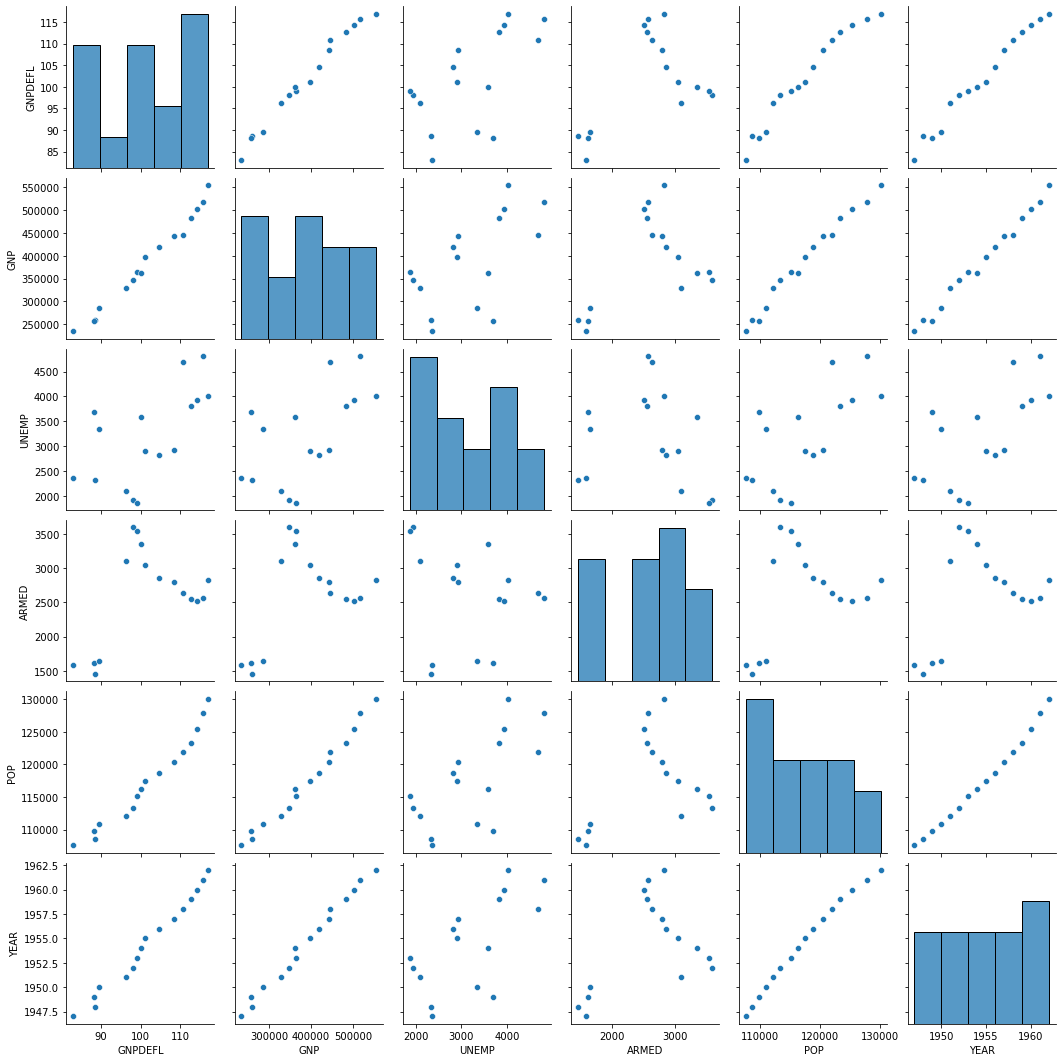

In [2]:
sns.pairplot(dfX)
plt.show()

In [3]:
dfX.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


<AxesSubplot:>

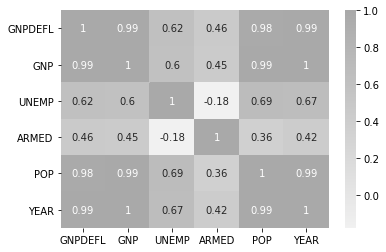

In [5]:
cmap=sns.light_palette("darkgray",as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap=cmap)

In [6]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
def get_model1(seed):
    df_train, df_test = train_test_split(df, test_size=0.5,random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ GNPDEFL + POP +GNP + YEAR + ARMED + UNEMP", data=df_train)
    return df_train, df_test, model.fit()
df_train, df_test, result1 = get_model1(3)
result1.summary()

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     437.5
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0366
Time:                        15:50:44   Log-Likelihood:                -44.199
No. Observations:                   8   AIC:                             102.4
Df Residuals:                       1   BIC:                             103.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+07   2.97e+06     -4.165      0.150      -5e+07    2.53e+07
GNPDEFL      106.2620     75.709      1.404      0.394    -855.708    1068.232
POP            2.2959      0.725      3.167      0.195      -6.915      11.506
GNP           -0.3997      0.120     -3.339      0.185      -1.920       1.121
YEAR        6300.6231   1498.900      4.203      0.149   -1.27e+04    2.53e+04
ARMED         -0.2450      0.402     -0.609      0.652      -5.354       4.864
UNEMP         -6.3311      1.324     -4.782      0.131     -23.153      10.491
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.304
Skew:                           0.300   Prob(JB):                        0.859
Kurtosis:                       2.258   Cond. No.                     2.01e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
def calc_r2(df_test, result):
    target=df.loc[df_test.index].TOTEMP
    predict_test=result.predict(df_test)
    RSS=((predict_test-target)**2).sum()
    TSS=((target-target.mean())**2).sum()
    return 1-RSS/TSS

train1=[]
test1=[]
for i in range(10):
    df_train, df_test,result=get_model1(i)
    train1.append(calc_r2(df_train, result))
    test1.append(calc_r2(df_test, result))

print(train1)
print(test1)

[0.9987038742050295, 0.9980503554982979, 0.9984751044825552, 0.9996192348457819, 0.9991092103164816, 0.99704913392946, 0.9990327438989924, 0.9995684924269972, 0.9990043448072191, 0.9998945799042561]
[0.9815050656802426, 0.9738497543073281, 0.9879366369764799, 0.7588861967894718, 0.9807206089301815, 0.8937889315019042, 0.8798563810548969, 0.9314665778951519, 0.8608525682026255, 0.9677198735177565]


In [8]:
def get_model2(seed):
    df_train, df_test = train_test_split(df, test_size=0.5,random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)",data=df_train)
    return df_train, df_test, model.fit()

df_train, df_test, result2=get_model2(3)
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     118.6
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           0.000231
Time:                        16:02:47   Log-Likelihood:                -57.695
No. Observations:                   8   AIC:                             123.4
Df Residuals:                       4   BIC:                             123.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.538e+04    163.988    398.686   

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
test2=[]
for i in range(10):
    df_train, df_test, result=get_model2(i)
    test2.append(calc_r2(df_test, result))

test2

[0.9763608388904904,
 0.9841984331185696,
 0.9687069366140132,
 0.939730405320179,
 0.9773357061188461,
 0.9561262155732316,
 0.9803852496698635,
 0.9917361722470805,
 0.9837134067639464,
 0.9789512977093204]

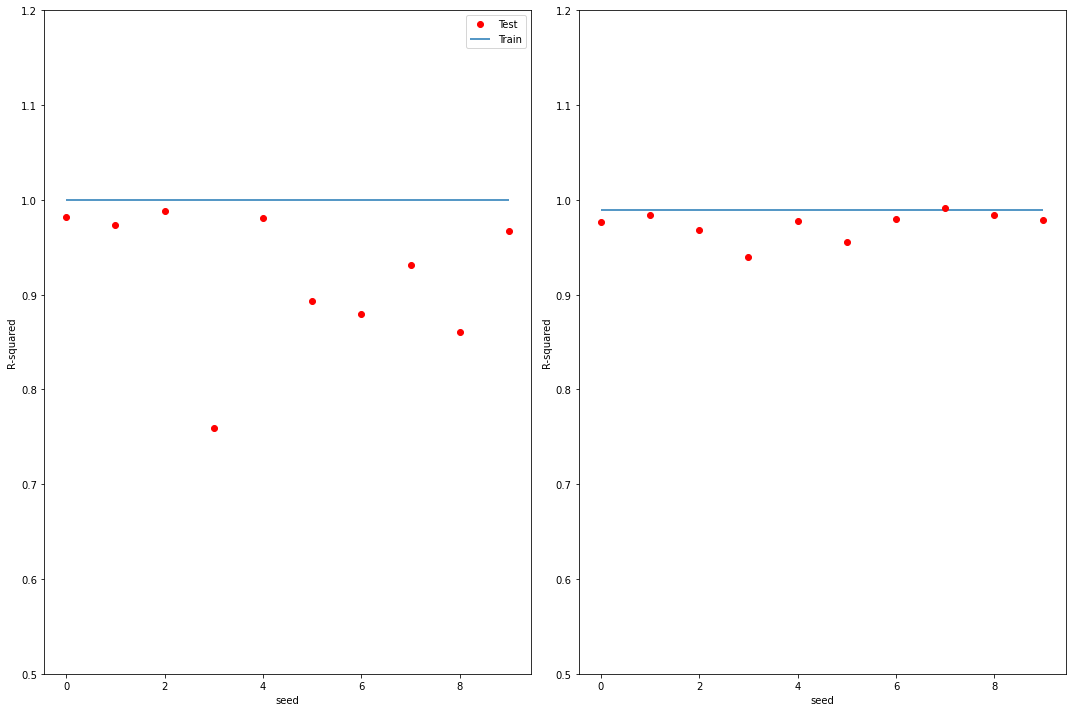

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(test1, 'ro',label="Test")
plt.hlines(result1.rsquared,0,9,label="Train")
plt.legend()
plt.xlabel("seed")
plt.ylabel("R-squared")
plt.ylim(0.5,1.2)

plt.subplot(122)
plt.plot(test2,'ro',label="Test")
plt.hlines(result2.rsquared,0,9,label="Train")
plt.xlabel("seed")
plt.ylabel("R-squared")
plt.ylim(0.5, 1.2)

plt.tight_layout()
plt.show()